In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re


# Load the CSV files
file1 = "GH_labelled_combined_csv_file.csv"
file2 = "HF_all_labels_from_gemini.csv"
f2 = "must_exclude_from_all_analysis.csv"
f3 = "families_per_bin_used.csv"

GH1 = pd.read_csv(file1, encoding='latin1')
HF1 = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')
family_bin = pd.read_csv(f3, encoding='latin1')

exclusion = list(dfs2['family'].unique())
excluded_labels = ['bug fix', 'unclear', 'uncategorized', 'add model']

GH2 = GH1[~GH1['family'].isin(exclusion)]
HF2 = HF1[~HF1['family'].isin(exclusion)]

GH_commit = GH2[~GH2['label'].isin(excluded_labels)]
HF_commit = HF2[~HF2['label'].isin(excluded_labels)]

GH = GH_commit.groupby(['label', 'commit_message'])['owner'].nunique().reset_index()
HF = HF_commit.groupby(['label', 'combined'])['owner'].nunique().reset_index()

GH_model_structure = GH[GH['label'] == "model structure"]
GH_external = GH[GH['label'] == "external documentation"]
GH_training = GH[GH['label'] == "training infrastructure"]
GH_validation = GH[GH['label'] == "validation infrastructure"]
GH_preprocessing = GH[GH['label'] == "preprocessing"]
GH_sharing = GH[GH['label'] == "sharing"]
GH_internal = GH[GH['label'] == "internal documentation"]
GH_pipeline = GH[GH['label'] == "pipeline performance"]
GH_parameter = GH[GH['label'] == "parameter tuning"]
GH_input = GH[GH['label'] == "input data"]
GH_update = GH[GH['label'] == "update dependency"]
GH_add = GH[GH['label'] == "add dependency"]
GH_project = GH[GH['label'] == "project metadata"]
GH_remove = GH[GH['label'] == "remove dependency"]
GH_output = GH[GH['label'] == "output data"]



HF_model_structure = HF[HF['label'] == "model structure"]
HF_external = HF[HF['label'] == "external documentation"]
HF_training = HF[HF['label'] == "training infrastructure"]
HF_validation = HF[HF['label'] == "validation infrastructure"]
HF_preprocessing = HF[HF['label'] == "preprocessing"]
HF_sharing = HF[HF['label'] == "sharing"]
HF_internal = HF[HF['label'] == "internal documentation"]
HF_pipeline = HF[HF['label'] == "pipeline performance"]
HF_parameter = HF[HF['label'] == "parameter tuning"]
HF_input = HF[HF['label'] == "input data"]
HF_update = HF[HF['label'] == "update dependency"]
HF_add = HF[HF['label'] == "add dependency"]
HF_project = HF[HF['label'] == "project metadata"]
HF_remove = HF[HF['label'] == "remove dependency"]
HF_output = HF[HF['label'] == "output data"]

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_17568\136268433.py:16: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GH1 = pd.read_csv(file1, encoding='latin1')


In [2]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_model_structure['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 12:56:26,511 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/28 [00:00<?, ?it/s]

2025-03-27 12:56:36,954 - BERTopic - Embedding - Completed ✓
2025-03-27 12:56:36,954 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 12:56:46,841 - BERTopic - Dimensionality - Completed ✓
2025-03-27 12:56:46,842 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 12:56:46,988 - BERTopic - Cluster - Completed ✓
2025-03-27 12:56:46,991 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 12:56:47,040 - BERTopic - Representation - Completed ✓


                  Word     Score
15          checkpoint  0.788630
11                flax  0.520401
8                files  0.457466
10        architecture  0.444931
19    samplefinetunepy  0.397046
9   mistralforcausallm  0.394739
16            template  0.321315
6       huggingfacehub  0.315452
17             weights  0.300193
7                 onnx  0.283297


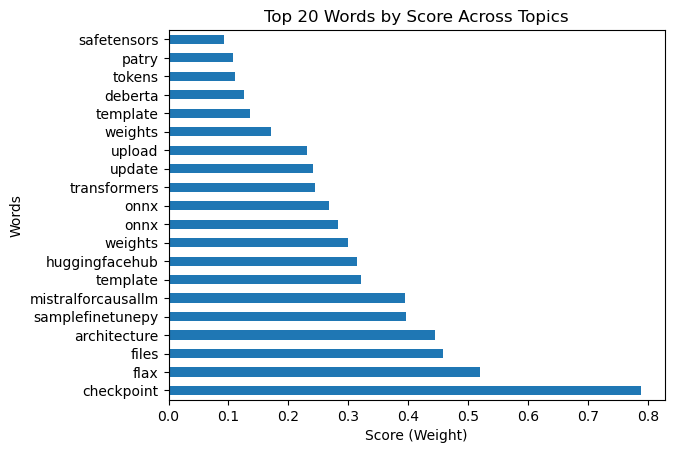

In [6]:
import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_model_structure_top_terms.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


In [11]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_external['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:26:45,649 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/33 [00:00<?, ?it/s]

2025-03-27 13:26:59,917 - BERTopic - Embedding - Completed ✓
2025-03-27 13:26:59,918 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:27:06,573 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:27:06,574 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:27:06,716 - BERTopic - Cluster - Completed ✓
2025-03-27 13:27:06,719 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:27:06,793 - BERTopic - Representation - Completed ✓


            Word     Score
13      citation  0.810994
12         paper  0.596417
14       latency  0.474446
8        license  0.466813
17      template  0.444461
18          docs  0.367434
6           typo  0.320548
16         terms  0.320215
15        create  0.289060
11  transformers  0.254962


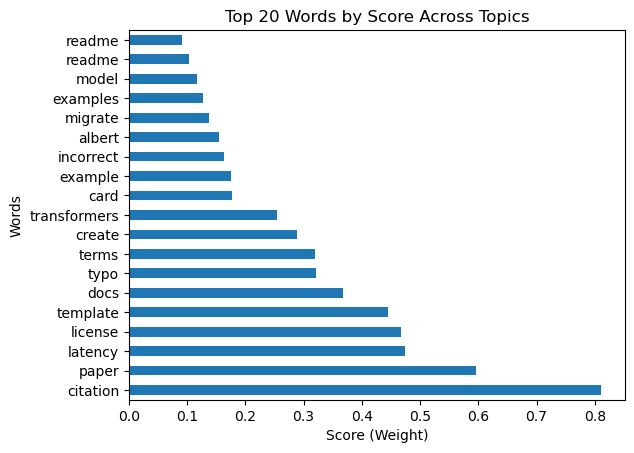

In [12]:
import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_external.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


In [14]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_training['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:28:30,036 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-03-27 13:28:31,152 - BERTopic - Embedding - Completed ✓
2025-03-27 13:28:31,152 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:28:33,802 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:28:33,803 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:28:33,818 - BERTopic - Cluster - Completed ✓
2025-03-27 13:28:33,822 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:28:33,838 - BERTopic - Representation - Completed ✓


       Word     Score
1    enable  0.398948
0  training  0.172305


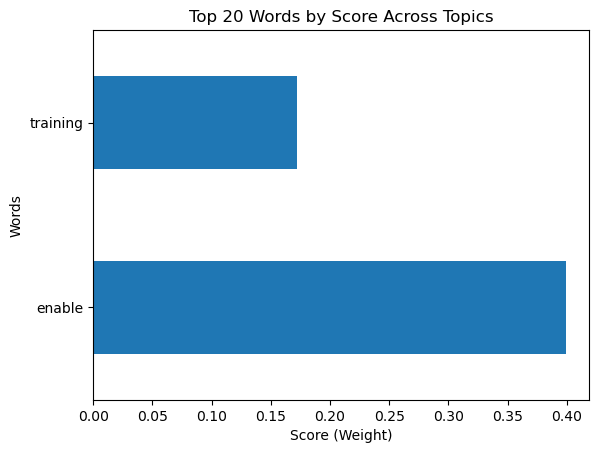

In [15]:
import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_training.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:33:17,948 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2025-03-27 13:33:19,315 - BERTopic - Embedding - Completed ✓
2025-03-27 13:33:19,316 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:33:21,911 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:33:21,912 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:33:21,932 - BERTopic - Cluster - Completed ✓
2025-03-27 13:33:21,937 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:33:21,957 - BERTopic - Representation - Completed ✓


         Word     Score
0   inference  1.548931
2       model  0.221524
1  evaluation  0.164145


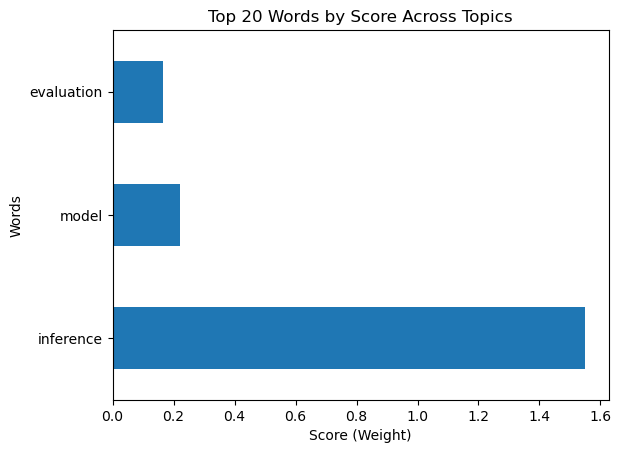

In [16]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_validation['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_validation.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:34:23,194 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2025-03-27 13:34:26,476 - BERTopic - Embedding - Completed ✓
2025-03-27 13:34:26,476 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:34:28,910 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:34:28,911 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:34:28,991 - BERTopic - Cluster - Completed ✓
2025-03-27 13:34:28,998 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:34:29,029 - BERTopic - Representation - Completed ✓


                     Word     Score
9                    fast  0.521099
8              configjson  0.438767
2                   vocab  0.266198
7  tokenizationphismallpy  0.259427
3                language  0.257132
4                   files  0.226986
1               tokenizer  0.185752
5     tokenizerconfigjson  0.180340
0                    chat  0.157839
6     tokenizerconfigjson  0.120081


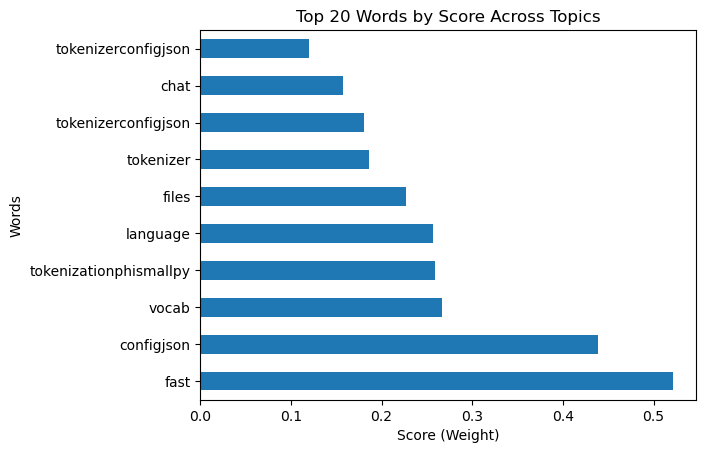

In [18]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_preprocessing['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_preprocessing.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:37:30,593 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2025-03-27 13:37:36,196 - BERTopic - Embedding - Completed ✓
2025-03-27 13:37:36,196 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:37:39,269 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:37:39,270 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:37:39,296 - BERTopic - Cluster - Completed ✓
2025-03-27 13:37:39,300 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:37:39,328 - BERTopic - Representation - Completed ✓


             Word     Score
3            main  0.440415
1            sync  0.354683
4  huggingfacehub  0.338003
0     safetensors  0.301901
5       duplicate  0.299835
2           model  0.169660


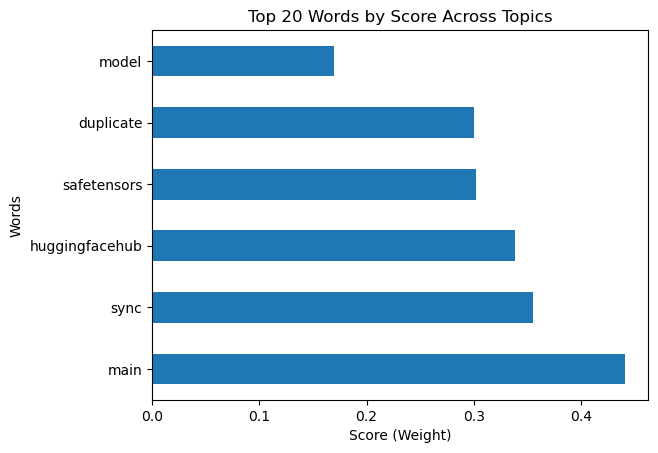

In [19]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_sharing['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_sharing.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:40:06,149 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-27 13:40:07,083 - BERTopic - Embedding - Completed ✓
2025-03-27 13:40:07,083 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:40:10,610 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:40:10,611 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:40:10,618 - BERTopic - Cluster - Completed ✓
2025-03-27 13:40:10,622 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:40:10,637 - BERTopic - Representation - Completed ✓


     Word     Score
0  update  0.178568


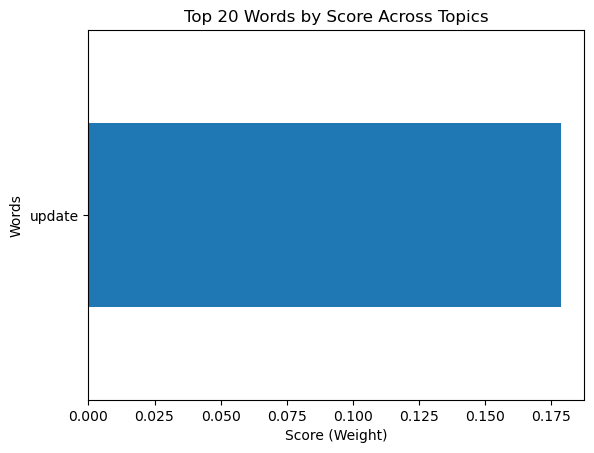

In [20]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_internal['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_internal.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


In [21]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_pipeline['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_pipeline.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:41:07,120 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-27 13:41:08,942 - BERTopic - Embedding - Completed ✓
2025-03-27 13:41:08,942 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:41:10,914 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:41:10,916 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:41:10,921 - BERTopic - Cluster - Completed ✓
2025-03-27 13:41:10,926 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:41:10,938 - BERTopic - Representation - Completed ✓


Empty DataFrame
Columns: [Word, Score]
Index: []


TypeError: no numeric data to plot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 13:42:31,119 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2025-03-27 13:42:33,036 - BERTopic - Embedding - Completed ✓
2025-03-27 13:42:33,037 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 13:42:35,096 - BERTopic - Dimensionality - Completed ✓
2025-03-27 13:42:35,098 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 13:42:35,119 - BERTopic - Cluster - Completed ✓
2025-03-27 13:42:35,124 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 13:42:35,151 - BERTopic - Representation - Completed ✓


             Word     Score
3  modelmaxlength  0.306773
0          config  0.226165
1      configjson  0.220755
2      configjson  0.174443


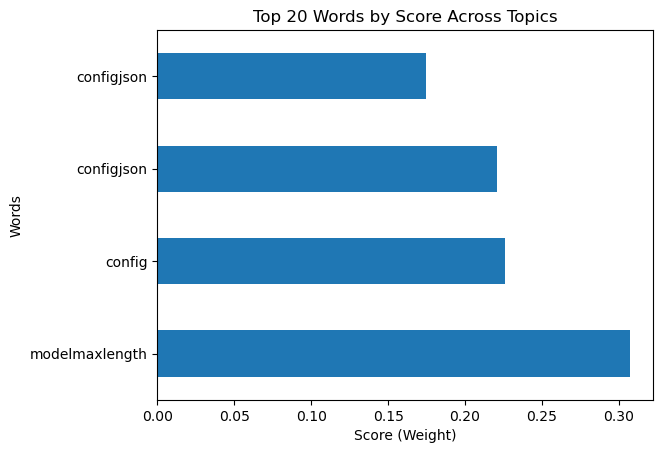

In [22]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_parameter['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_parameter.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 14:24:02,383 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-27 14:24:03,215 - BERTopic - Embedding - Completed ✓
2025-03-27 14:24:03,216 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 14:24:08,244 - BERTopic - Dimensionality - Completed ✓
2025-03-27 14:24:08,245 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 14:24:08,251 - BERTopic - Cluster - Completed ✓
2025-03-27 14:24:08,257 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 14:24:08,270 - BERTopic - Representation - Completed ✓


      Word     Score
0  dataset  0.198771


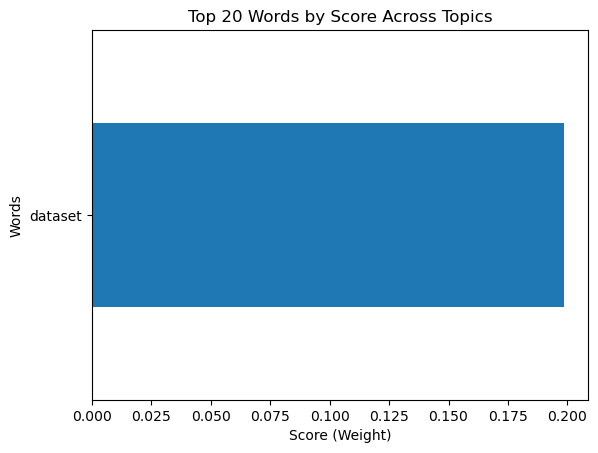

In [23]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_input['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_input.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 14:50:45,169 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-27 14:50:46,110 - BERTopic - Embedding - Completed ✓
2025-03-27 14:50:46,111 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 14:50:48,153 - BERTopic - Dimensionality - Completed ✓
2025-03-27 14:50:48,155 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 14:50:48,160 - BERTopic - Cluster - Completed ✓
2025-03-27 14:50:48,165 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 14:50:48,178 - BERTopic - Representation - Completed ✓


     Word     Score
0  update  0.272962


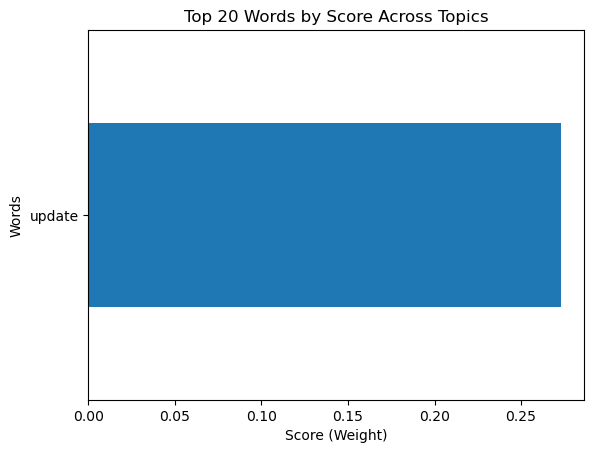

In [24]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_update['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_update.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


In [25]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_add['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_add.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 14:54:05,581 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2025-03-27 14:54:07,268 - BERTopic - Embedding - Completed ✓
2025-03-27 14:54:07,268 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 14:54:09,392 - BERTopic - Dimensionality - Completed ✓
2025-03-27 14:54:09,393 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 14:54:09,400 - BERTopic - Cluster - Completed ✓
2025-03-27 14:54:09,405 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 14:54:09,418 - BERTopic - Representation - Completed ✓


Empty DataFrame
Columns: [Word, Score]
Index: []


TypeError: no numeric data to plot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 14:55:48,912 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2025-03-27 14:55:50,658 - BERTopic - Embedding - Completed ✓
2025-03-27 14:55:50,659 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 14:55:52,695 - BERTopic - Dimensionality - Completed ✓
2025-03-27 14:55:52,696 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 14:55:52,718 - BERTopic - Cluster - Completed ✓
2025-03-27 14:55:52,723 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 14:55:52,749 - BERTopic - Representation - Completed ✓


         Word     Score
3     release  0.456635
4     license  0.411866
2      commit  0.314902
0  llmfoundry  0.263462
5   basemodel  0.249179
1        link  0.148249


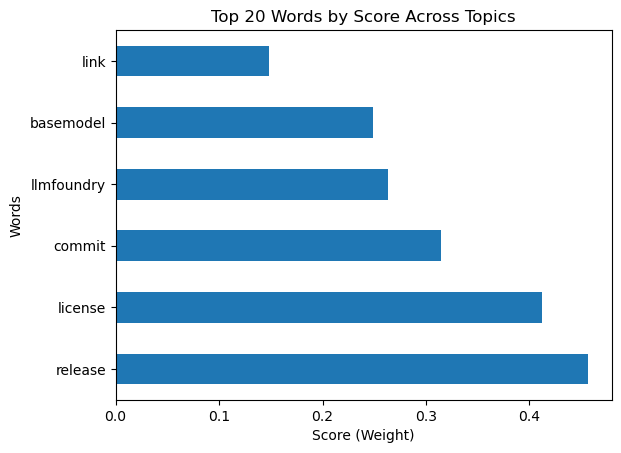

In [26]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_project['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_project.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


In [27]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_remove['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_remove.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:09:49,134 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-27 15:09:49,817 - BERTopic - Embedding - Completed ✓
2025-03-27 15:09:49,818 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:09:53,012 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:09:53,013 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:09:53,019 - BERTopic - Cluster - Completed ✓
2025-03-27 15:09:53,023 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:09:53,033 - BERTopic - Representation - Completed ✓


Empty DataFrame
Columns: [Word, Score]
Index: []


TypeError: no numeric data to plot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LabSystem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-03-27 15:10:34,221 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/12 [00:00<?, ?it/s]

2025-03-27 15:10:37,068 - BERTopic - Embedding - Completed ✓
2025-03-27 15:10:37,068 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 15:10:39,352 - BERTopic - Dimensionality - Completed ✓
2025-03-27 15:10:39,354 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 15:10:39,399 - BERTopic - Cluster - Completed ✓
2025-03-27 15:10:39,405 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-27 15:10:39,441 - BERTopic - Representation - Completed ✓


                        Word     Score
7  modelsafetensorsindexjson  0.327766
6            pytorchmodelbin  0.287525
4                       onnx  0.268665
0                      files  0.249993
3                safetensors  0.219587
1             huggingfacehub  0.192577
2             huggingfacehub  0.192577
5             huggingfacehub  0.192577


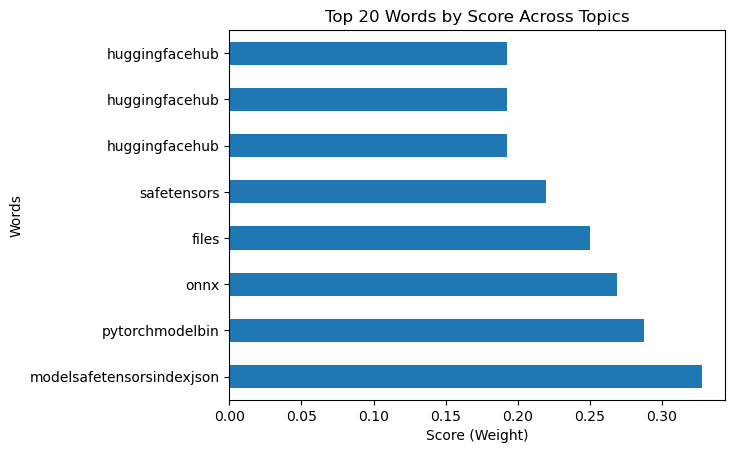

In [28]:
# GitHub Model_structure

import re
import nltk
from nltk.corpus import stopwords
from bertopic import BERTopic
from collections import Counter
import pandas as pd

# Download the NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Extract commit messages as a list
docs = HF_output['combined'].astype(str).tolist()

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess commit messages
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase

    # Remove specific words and file extensions
    text = re.sub(r'\b(by|co|of|authored|.md)\b', '', text, flags=re.IGNORECASE)
    
    # Remove numbers and special characters (except hyphens and spaces)
    text = re.sub(r'[^\w\s-]', '', text)
    
    # Remove stopwords using NLTK's stopwords list
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    # Remove words that are shorter than 3 characters (e.g., "by", "of", "co")
    text = re.sub(r'\b\w{1,2}\b', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing to all commit messages
cleaned_docs = [preprocess_text(message) for message in docs]

# Initialize and train BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(cleaned_docs)

# Extract the words from each topic
topic_word_distributions = topic_model.get_topics()


import re
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Manually define irrelevant or generic words
irrelevant_words = {"joao", "delete", "init", "flash", "sentence", "upload", "adds"}

# Helper function to clean unwanted words
def clean_word(word):
    # Remove non-alphabetic terms and terms shorter than 3 characters
    word = re.sub(r'[^a-zA-Z]', '', word)
    
    if len(word) <= 3 or word in ENGLISH_STOP_WORDS or word in irrelevant_words:
        return None
    
    return word.lower()

# Get the topic-word distributions
topic_word_distributions = topic_model.get_topics()

# Create a list to hold top words for each topic (sorted by weight)
top_words = []

# Extract the highest-scoring word for each topic
for topic_id, words in topic_word_distributions.items():
    # Sort words in each topic by their weight, in descending order
    sorted_words = sorted(words, key=lambda x: x[1], reverse=True)
    
    # Take the top word from each topic (highest score)
    top_word = sorted_words[0]  # Highest weight word
    cleaned_word = clean_word(top_word[0])
    
    if cleaned_word:  # Only add cleaned word
        top_words.append((cleaned_word, top_word[1]))

# Convert the top words to a DataFrame for easier viewing
top_words_df = pd.DataFrame(top_words, columns=["Word", "Score"])

# Sort by score in descending order
top_words_df = top_words_df.sort_values(by="Score", ascending=False)

# Print the top words
top_10 = top_words_df.head(10)
print(top_10)
top_10.to_csv("HF_output.csv", index=False)

# Optional: Visualize the top words
import matplotlib.pyplot as plt

top_words_df.head(20).plot(kind="barh", x="Word", y="Score", legend=False)
plt.title("Top 20 Words by Score Across Topics")
plt.xlabel("Score (Weight)")
plt.ylabel("Words")
plt.show()
